## Plotting B&eacute;zier Triangular Patches with <br /> Python Plotly##

#### ABOUT THE AUTHOR:

This notebook was contributed by [Plotly user Emilia Petrisor](https://plot.ly/~empet).  You can follow Emilia on Twitter [@mathinpython](https://twitter.com/mathinpython) or [GitHub](https://github.com/empet). 

### The de  Casteljau algorithm for computing   points on a triangular B&eacute;zier patch###

A B&eacute;zier triangular patch is a parameterized polynomial surface. Its  parameters belong to a triangular 2D region, $T$.
The triangle vertices, $T_0, T_1, T_2$, are  denoted  counterclockwise like in the figure below:

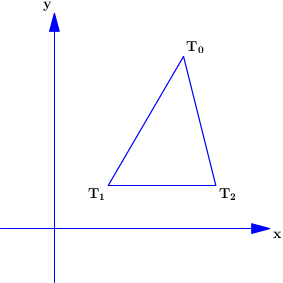

In [1]:
from IPython.display import Image
Image(filename='Imag/triangle.png')

Each point $P$ in $T$ is expressed as a convex combination of the vertices $T_0, T_1, T_2$:

$P=\lambda_0T_0+\lambda_1T_1+\lambda_2T_2$, $\lambda_i\geq 0$, $i=\overline{0,2}$, and $\lambda_0+\lambda_1+\lambda_2=1$

The scalars $\lambda_i$ are the *barycentric coordinates* of  the point $P$.



If  $(x_i, y_i)$ are the cartesian coordinates of the vertices $T_i$, $i=\overline{0,2}$, and $P(x, y)$ 
is a point in the corresponding triangular region, then its baycentric coordinates are given by 
the  solution of the linear system:

$$\left[\begin{array}{ccc} 
x_0&x_1&x_2\\
y_0&y_1&y_2\\
1&1&1\end{array}\right]
\left[\begin{array}{c}\lambda_0\\\lambda_1\\\lambda_2\end{array}\right]=
\left[\begin{array}{c} x\\y\\1\end{array}\right]$$


There is a one-to-one correspondence between the points of  the triangle $T$ and the  triangle $\Delta$, in 3D, of vertices
$A_0(1,0,0)$, $A_1(0,1,0)$, $A_2(0,0,1)$. Namely, to each $P(x,y)\in T$ one associates its barycentric coordinates  $(\lambda_0, \lambda_1, \lambda_2)\in\Delta$.


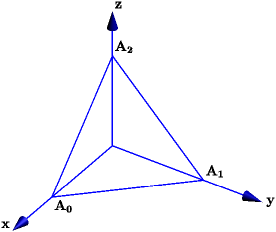

In [2]:
Image(filename='Imag/triangle3D.png')

A B&eacute;zier triangular patch is defined by an integer $n>0$, and a triangular net of 3D points
${\bf b}_{ijk}$, with $i, j, k\geq 0$  integers such that $i+j+k=n$. Its parameterization is:
$S: (\lambda_0, \lambda_1, \lambda_2)\in \Delta \to \sum_{i+j+k=n}\frac{n!}{i!j!k!}\lambda_0^i\lambda_1^j\lambda_2^k {\bf b}_{ijk}$    

Since the sum of powers of $\lambda_0, \lambda_1, \lambda_2$ is $n$, the patch is said to have the total degree $n$.

A point on  such a surface corresponding to the parameters $(\lambda_0, \lambda_1, \lambda_2)$ is computed recursively  by the *triangular de Casteljau algorithm*:

$$\begin{array}{lll}
{\bf b}_{ijk}^0&=&{\bf b}_{ijk}\\
  {\bf b}_{ijk}^r&=&\lambda_0{\bf b}_{i+1\,j\,k}^{r-1}+\lambda_1{\bf b}_{i\, j+1\, k}^{r-1}
+\lambda_2{\bf b}_{i\,j\,k+1}^{r-1},\end{array}$$ 
where $r=\overline{1,n}$, and $i+j+k=n-r$.


The last computed point,  ${\bf }b_{000}^n$, is a point on the surface.

Details on the triangular B&eacute;zier patches can be found in:
    
   1. G Farin, Curves and Surfaces for Computer Aided Geometric Design: A Practical Guide, Morgan Kaufmann, 2002.
   2. J. Gallier, Curves and Surfaces in Geometric Modeling: Theory and Algorithms, Morgan Kaufmann, 1999. 
    A free electronic version can be downloaded [here](http://www.cis.upenn.edu/~jean/gbooks/geom1.html).    

 The $(n+1)(n+2)/2$ control points, ${\bf b}_{ ijk}$, are placed in a triangular  structure  in the same way as
 the points $(i/n, j/n, k/n)$   are located in the triangle $\Delta$ of vertices  $A_0(1,0,0)$, $A_1(0,1,0)$, $A_2(0,0,1)$. 
 
We illustrate here the case  $n=3$:

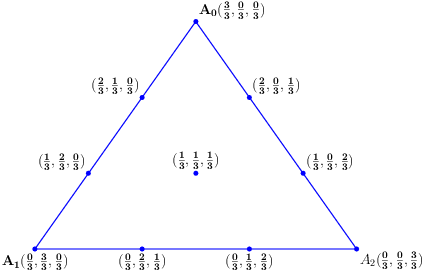

In [3]:
Image(filename='Imag/ijk.png')

Hence to generate a B&eacute;zier triangular patch of total degree $3$ we start with a net of points:

$$\begin{array}{lllllll}
   & &  &          {\bf b}_{300} &        &  &  \\
   & & & & & & \\
   &  & {\bf b}_{210} &           & {\bf b}_{201} &  &  \\
    & & & & & & \\
   & {\bf b}_{120} &  &      {\bf b}_{111}    &  & {\bf b}_{102} &  \\
    & & & & & & \\
  {\bf b}_{030} &  & {\bf b}_{021}&          & {\bf b}_{012} &  & {\bf b}_{003}
\end{array}$$

The point indices in a triangular net or the indices that define points in  a triangular grid  of $\Delta$,  as above,
 are returned by the following function::

In [4]:
def indexes(n):
    return [(i,j, n-(i+j)) for i in range(n,-1, -1) for j in range(n-i, -1, -1)]

In [5]:
print indexes(3)

[(3, 0, 0), (2, 1, 0), (2, 0, 1), (1, 2, 0), (1, 1, 1), (1, 0, 2), (0, 3, 0), (0, 2, 1), (0, 1, 2), (0, 0, 3)]


In each step, $r$,  of the de Casteljau recursive formula, one computes  succesively  the convex combinations with the same coefficients, $\lambda_0, \lambda_1, \lambda_2$, of all  triplets of  nearby points
in the net ${\bf b}^{r-1}_{ijk}$. The relative position of points in a such triplet is illustrated  in the next cell:


$$\begin{array}{lll} & *& \\
*& &*\end{array}$$

In the following we give the nets  of points resulted from each  step $r$.
Starting with the initial control points:

$$
\begin{array}{lllllll}
   & &  &          {\bf b}^0_{300} &        &  &  \\
   & & & & & & \\
   &  & {\bf b}^0_{210} &           & {\bf b}^0_{201} &  &  \\
    & & & & & & \\
   & {\bf b}^0_{120} &  &      {\bf b}^0_{111}    &  & {\bf b}^0_{102} &  \\
    & & & & & & \\
  {\bf b}^0_{030} &  & {\bf b}^0_{021}&          & {\bf b}^0_{012} &  & {\bf b}^0_{003}
\end{array}$$

the step $r=1$ computes the points:

$$
\begin{array}{lllll}
   &  &          {\bf b}^1_{300} &        &   \\
    & & & &  \\
     & {\bf b}^1_{210} &           & {\bf b}^1_{201} &    \\
    & & & &  \\
    {\bf b}^1_{120} &  &      {\bf b}^1_{111}    &  & {\bf b}^1_{102} &  
  \end{array}$$

while $r=2$, the points:

$$\begin{array}{lll}
     &          {\bf b}^2_{300} &          \\
     & &  \\
      {\bf b}^2_{210} &           & {\bf b}^2_{201}    
  \end{array}$$

In the last step, $r=3$,  we get  the point on the surface, ${\bf b}^3_{300}$, corresponding to the parameters $(\lambda_0, \lambda_1,\lambda_2)$.

To implement the  de Castelajau algorithm we store the control points   in a list of points, concatenating the rows of the theoretical triangular net.

We define the function `deCasteljau_step`  that evaluates the convex combinations for one step of the de Casteljau formula. Its arguments are
the degree `n`, the list of points, `b`, and the triplet of barycentric coordinates, `lam`:

In [6]:
import numpy as np
from __future__ import division

In [7]:
def deCasteljau_step(n, b, lam):
    
    i=0
    j=1
    for nr in range(1, n+1):
        for k in range(nr):
            b[i]=lam[0]*b[i]+lam[1]*b[j]+lam[2]*b[j+1]
            i+=1
            j+=1
        j+=1
    return b[:-(n+1)]

de  Casteljau algorithm is implemented by the following recursive function:

In [8]:
def deCasteljau(n,b,lam):
    
    if len(b)>1:       
        return deCasteljau(n-1, deCasteljau_step(n, b, lam), lam)   
    else: 
        return b[0]

###A discretization method of a triangular B&eacute;zier patch for plotting with Plotly###

 In the following we present a method of discretization of a triangular B&eacute;zier patch, such that to get the data  that define a `plotly Surface`.
 
 The basic idea is to define a rectangular grid  that covers the triangle $\Delta$ of barycentric coordinates. The `deCasteljau` function, evaluated at each point $(\lambda_0, \lambda_1, \lambda_2)$ of this grid, defines  a triangular net of points on the surface. These points are then integrated into a meshgrid over the rectangle 
 `[min(X), max(X)], [min(Y), max(Y)]`, where `X` and `Y` are the lists  of x, respectively y-coordinates of the points on the surface.
 

We start with   a triangular grid  of the triangle $\Delta$  constructed from indexes returned by the function `indexes,` called for an even integer $2m$. 
 
 We illustrate our method for a low value of $m=4$ (see the next image). 
    

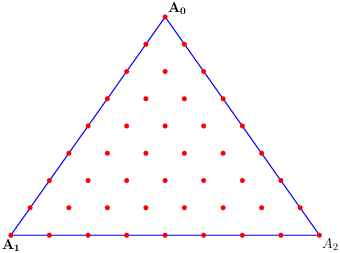

In [9]:
Image(filename='Imag/triangulation.png')

On each side we have $2m+1$ points. Considering the points on the side $A_1A_2$ as reference points, we exclude from this grid the points that
do not lie on perpendiculars at reference points, on $A_1A_2$. That is, we remove the points in the odd rows (parallel to $A_1A_2$).

In fact we define a function `even_rows` that just generate only the points in the even rows of the above triangulation:


In [10]:
def even_row_pts(p):#p=2*m
    
    if p%2:
        raise ValueError('p must be an even integer')
    I=[2*k for k in range (p+1)]
    return [(i/p,j/p, 1-(i+j)/p) for i in I[::-1] for j in range(p-i, -1, -1)]

and get a less dense grid:

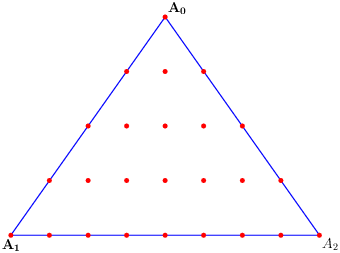

In [11]:
Image(filename='Imag/even_rows.png')

 Now to each two consecutive points placed on the same perpendicular to $A_1A_2$ one associates the mid point. Thus we construct 
additional points to the initial grid (the green points in the next image):

In [12]:
def additional_weights(m, weights):
    
    wei=map(np.array, weights)
    new_weights=[]
    a=0
    for k in range(1, m+1):
        for j in range(1,2*k):
            new_weights.append((wei[a]+wei[a+2*k])/2)
            a=a+1
    return list(map(tuple, new_weights))        

The  function `grid` mixes the two  lists  of points:

In [13]:
def grid(m, weights, new_weights):
    
    L=len(weights)
    barycenters=[]
    for  k in range(m):
        L=2*k+1
        enD=k**2+L 
        barycenters +=weights[k**2: enD] +new_weights[k**2: enD]
    barycenters+=weights[m**2:]  
    return barycenters

and the final grid of the triangle $A_0A_1A_2$ looks as follows:

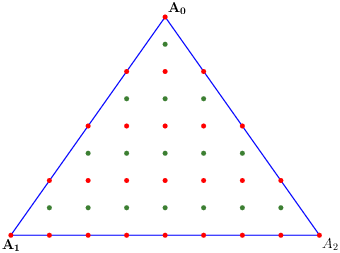

In [14]:
Image(filename='Imag/finalgrid.png')

To each point (triplet of weights) in this grid one associates a point on the B&eacute;zier patch. 

The following function discretizes a B&eacute;zier surface of degree `n`, control points `b`, and grid points `barycenters`, defined  above:

In [15]:
def surface_points(n, b, barycenters):
    
    points=[]
    for weight in barycenters:
        b_aux=np.array(b)
        points.append(deCasteljau(n, b_aux, weight))
    return zip(*points)    

In order to plot the discretized patch we need to construct three arays of shape (2m+1,2m+1) (or a list of lists) that contain in an appropriate position
the x, y, respectively z-coordinates of the computed points.

The  values in a list of coordinates are   placed  succesively in the red positions, while outside   the triangle, similar to the triangle $A_1A_1A_2$, we store `None` values:

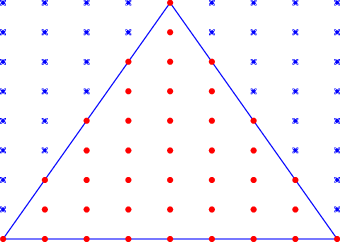

In [16]:
Image(filename='Imag/gridData.png')

The function `move_data_to_triangle` returns a list of lists. The values in a list of coordinates, `D`, are assigned correspondingly to  locations   placed within the formal triangle included in this list of lists:

In [17]:
def move_data_to_triangle(m, D):
    
    DD=[]
    pos=0
    for i in range(m):
        L1=[None]*(2*m+1)
        L2=[None]*(2*m+1)
        idx=[m-i+J for J in range(2*i+1)] 
        
        for k in range(2*i+1):
            L1[idx[k]]=D[pos]
            pos+=1 
        for k in range(2*i+1):
            L2[idx[k]]=D[pos]
            pos+=1
        
        DD.append(L1)
        DD.append(L2)
    K=-(2*m+1)    
    DD.append(D[K:]) 
    return DD
   

 `set_data_for_Surface` includes all previous functions that prepare data for a plot:

In [18]:
def set_data_for_Surface(n, b, m):
    
    if len(b)!=(n+1)*(n+2)/2:
        raise ValueError('incorect number of control points')
    weights=even_row_pts(2*m)
    new_weights=additional_weights(m, weights)
    grid_pts=grid(m, weights, new_weights)
    X, Y, Z=surface_points(n, b, grid_pts)
    ZZ=move_data_to_triangle(m, Z)
    XX= move_data_to_triangle(m, X)
    YY=move_data_to_triangle(m, Y)
    return [XX, YY, ZZ]

A  colorscale   derived from  the future `viridis` [colormap](http://matplotlib.org/style_changes.html) is used to plot a `Surface`:

In [19]:
viridisCS=[[0.0, '#440154'],
 [0.06274509803921569, '#48186a'],
 [0.12549019607843137, '#472d7b'],
 [0.18823529411764706, '#424086'],
 [0.25098039215686274, '#3b528b'],
 [0.3137254901960784, '#33638d'],
 [0.3764705882352941, '#2c728e'],
 [0.4392156862745098, '#26828e'],
 [0.5019607843137255, '#21918c'],
 [0.5647058823529412, '#1fa088'],
 [0.6274509803921569, '#28ae80'],
 [0.6901960784313725, '#3fbc73'],
 [0.7529411764705882, '#5ec962'],
 [0.8156862745098039, '#84d44b'],
 [0.8784313725490196, '#addc30'],
 [0.9411764705882353, '#d8e219'],
 [1.0, '#fde725']]

In [20]:
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *

In [21]:
py.sign_in('empet', 'shzbvu3hbh')

`plot_Surface`  generates a triangular B&eacute;zier patch of degree `n` and control points `b`, over the triangular grid of $2m+1$ points on each side of the barycenter triangle $\Delta$:

In [22]:
def plot_Surface(n, b, m,  plot_title): 

    x, y, z= set_data_for_Surface(n, b, m)
    
    trace = Surface(
        z=z, 
        x=x,  
        y=y,   
        colorscale=viridisCS
        )
        
    axis = dict(
    showbackground=True, 
    backgroundcolor="rgb(230, 230,230)",
    gridcolor="rgb(255, 255, 255)",      
    zerolinecolor="rgb(255, 255, 255)",  
    )

    layout = Layout(
         title=plot_title, 
         width=600,
         height=600,
         scene=Scene(  
         xaxis=XAxis(axis),
         yaxis=YAxis(axis), 
         zaxis=ZAxis(axis)  
        )
        )
    fig = Figure(data=[trace], layout=layout)
    return fig

Finally we generate our first B&eacute;zier patch of degree $n=4$, over a grid corresponding to  $m=80$:

In [23]:
n=4
b=[[2.0, 3.0, 2.0],
 [1.5, 2.25, 3.0],
 [2.5, 2.25, 5.0],
 [1.0, 1.5, 4.0],
 [2.0, 1.5, 5.0],
 [3.0, 1.5, 3.0],
 [0.5, 0.75, 1.0],
 [1.5, 0.75, 3.0],
 [2.5, 0.75, 1.0],
 [3.5, 0.75, 4.0],
 [0.0, 0.0, 2.0],
 [1.0, 0.0, 5.0],
 [2.0, 0.0, 3.0],
 [3.0, 0.0, 1.0],
 [4.0, 0.0, 4.0]]
m=80

In [24]:
fig=plot_Surface(n, b, m,  'Bezier triangular patch of degree 4')
py.iplot(fig, filename='Bezier-triangular-patch')

###Plotting the control polyhedron of a triangular B&eacute;zier patch###

A B&eacute;zier triangular patch of degree $n$ and control points ${\bf b}_{ijk}$ interpolates the corners of the triangular net formed by these points, that is, it interpolates
the points ${\bf b}_{n00}, {\bf b}_{0n0}, {\bf b}_{00n}$, and it is included in the convex hull of all its control points.


To illustrate this property we define the  control polyhedron of the patch, i.e. the plotly trace
we get connecting with lines the points in a triplet of nearby points.

The function `triangles` returns the lists of all triplets of nearby points in the triangular net ${\bf b}_{ijk}$, $i+j+k=n$:

In [25]:
def triangles(n, b):
    
    triplets=[]
    i=0
    j=1
    for nr in range(1,n+1):
        for k in range(nr):
            triplets.append([b[i], b[j], b[j+1]])
            i+=1
            j+=1
        j+=1
    return triplets    

and the function `triangle_lines` prepares  data for a `Scater3d` trace of the control polyhedron edges:

In [26]:
def triangle_lines(triplets):

    line_pts=[]
    for tri in triplets:
        x, y, z=zip(*tri)
        x=list(x)+[x[0]]
        y=list(y)+[y[0]]
        z=list(z)+[z[0]]
        line_pts.append(Scatter3d(x=x, y=y, z=z,
                              name='',
                              mode='lines+markers', 
                              line=Line(color='#000762',
                                        width=4),
                              marker=Marker(
                              symbol='dot',
                              size=5,
                              color='#000762')
                                 )   
                       )
    return line_pts

The function `plot_surface_polyedron` plots both a B&eacute;zier patch and its control polyedron:
    

In [27]:
def plot_surface_polyhedron(n, b, m, plot_title):
    
    x, y, z= set_data_for_Surface(n, b, m)
    
    trace = Surface(
        z=z, 
        x=x,  
        y=y,   
        colorscale=viridisCS
        )
    
    triplets=triangles(n,b)
    lines_pts=triangle_lines(triplets)
    
    axis = dict(
    showbackground=True, 
    backgroundcolor="rgb(230, 230,230)",
    gridcolor="rgb(255, 255, 255)",      
    zerolinecolor="rgb(255, 255, 255)",  
    )

    layout = Layout(
         title=plot_title, 
         width=600,
         height=600,
         showlegend=False,
         scene=Scene(  
         xaxis=XAxis(axis),
         yaxis=YAxis(axis), 
         zaxis=ZAxis(axis)  
         )
        )
    fig = Figure(data=[trace]+lines_pts, layout=layout)
    return fig

Data for a cubic (degree  $n=3$) triangular B&eacute;zier patch and its control polyhedron:

In [28]:
n=3
d=[[2.5, 2.5, 1.5],
  [1.3, 2, 3],
  [3, 2.5, 3],
  [1, 1, 2],
  [2.5, 1, 4],
  [4, 1, 1],
  [0, 1, 1],
  [2, 0, 2],
  [3, -0.5, 1.5],
  [5, 0, -0.5]]
m=80

In [29]:
fig=plot_surface_polyhedron(n,d, m, 'A cubic triangular Bezier patch and its control polyhedron')
py.iplot(fig, filename='Bezier-cubic')

### Triangular B&eacute;zier graphs and their contour plots###

A degree $n$ triangular B&eacute;zier patch is the graph of a function defined on a planar triangular region of vertices
$T_0, T_1, T_2$,  if its control points have the coordinates
${\bf b}_{ijk}=(x_{ijk},y_{ijk}, z_{ijk})$, $i+j+k=n$, where $(x_{ijk},y_{ijk})$ are points in the triangular region $T$, of barycentric coordinates $(i/n, j/n, k/n)$, and $z_{ijk}$ are real values set by the user.



Initial data for defining such a graph are:
  - the degree, $n$
  - the triangle $T$ given as a list of three numpy arrays of shape (2,)
  - a list, `b_z`, of $(n+1)(n+2)/2$ real values representing  $z$-coordinates of the control points 

The function:

In [60]:
cartesian_coords=lambda w, T: w[0]*T[0]+w[1]*T[1]+w[2]*T[2]

calculates the cartesian coordinates of a point having barycentic coordinates $(w_0, w_1, w_2)$, with respect to a triangle $T$.

The control points of the graph are returned by the following function:

In [64]:
def control_points(n, T, b_z):
    ind=indexes(n)
    weights=[(i/n, j/n, k/n) for (i, j, k) in ind]
    b_xy=[cartesian_coords(w,T) for w in weights]
    b_xy=map(list, b_xy)
    len_bxy=len(b_xy)
    b=[b_xy[k]+[b_z[k]] for k in range(len_bxy)]
    return b

Let us define a B&eacute;zier triangular graph of degree $n=4$, over the triangle $T$:

In [65]:
n=4
m=80
nr_ctrl_pts=(n+1)*(n+2)/2
T=[np.array([0, 1.5]), np.array([-1,0]), np.array([1, 0])]

$z$-coordinates of the control points are set arbitrary in the interval $[1,5]$:

In [66]:
b_z=1+4*np.random.random(nr_ctrl_pts)

Then the control points of our graph are:

In [67]:
b=control_points(n, T, b_z)

In [69]:
fig=plot_Surface(n, b, m,  'Graph as a triangular Bezier patch')
py.iplot(fig, filename='triangular-Bezier-graph4')

###Contour plot of a triangular B&eacute;zier graph###

Having a method to generate a triangular B&eacute;zier graph, we  can generate its contour plot with Plotly.

We set the data  for a plotly `Contour`, namely a 2D array or a list of lists for z-values on the surface, and two 1D lists for x, respectively y-coordinates of the grid points in the triangle $T$.

In [70]:
n=4
m=80

In [71]:
weights=even_row_pts(2*m)
new_weights=additional_weights(m, weights)
grid_pts=grid(m, weights, new_weights)
X, Y, Z=surface_points(n, b, grid_pts)
ZZ=move_data_to_triangle(m, Z)[::-1]

Get the x-list for `Contour`:

In [73]:
K=-(2*m+1)  
XX= [cartesian_coords(w,T)[0] for w in grid_pts[K:]]   
x=sorted(list(set(XX)))


and the y-list:

In [74]:
I=[k**2 for k in range(m)]
Lam=[]
for k in range(m):
    Lam.append(weights[I[k]+k])
    Lam.append(new_weights[I[k]+k])
Lam.append(weights[-(m+1)] )   
YY=[cartesian_coords(w,T)[1] for w in  Lam]
y=sorted(list(set(YY)))


Plot the triangular contour:

In [76]:
title="Contourplot of a triangular Bezier function"
data = Data([
    Contour(
        z=ZZ,
        x=x, 
        y=y,
        autocontour=False,
        zauto=False,  
        contours=Contours(
            showlines=False,    
            start =min(Z),   
            end=max(Z),
            size=0.1
        ),    
        colorscale=viridisCS, 
    ),
    ])
layout = Layout(
    title= title,  
    font= Font(family='Georgia, serif',  color='#635F5D'),
    showlegend=False,
    autosize=False,
    width=500,
    height=500,
    xaxis=XAxis(
        range=[min(x), max(x)],
        showgrid=False,
    ),
    yaxis=YAxis(
        range=[min(y), max(y)],
        showgrid=False,
    ),
    margin=Margin(
        l=40,
        r=40,
        b=85,
        t=100,
        pad=0,
        autoexpand=True
    ),
    )
fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='Contourplot-triangular-Bezier-graph4')

Another pair graph-contour plot can be seen here:
 - graph: https://plot.ly/~empet/2266/graph-as-a-triangular-bezier-patch/    
 - contour plot: https://plot.ly/~empet/2268/contourplot-of-a-triangular-bezier-function/   

In [2]:
! pip install publisher --upgrade

from IPython.display import HTML, display

display(HTML('<link href="//fonts.googleapis.com/css?family=Open+Sans:600,400,300,200|Inconsolata|Ubuntu+Mono:400,700" rel="stylesheet" type="text/css" />'))
display(HTML('<link rel="stylesheet" type="text/css" href="https://help.plot.ly/documentation/all_static/css/ipython-notebook-custom.css">'))

import publisher
publisher.publish('bezier', '/ipython-notebooks/bezier-triangular-patches/', 
                  'Bézier Triangular Patches', 
                  'How to make bézier triangular patches with Python and Plotly graphs.')

You are using pip version 7.0.3, however version 7.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
DEPRECATION: --download-cache has been deprecated and will be removed in the future. Pip now automatically uses and configures its cache.
Requirement already up-to-date: publisher in /Users/nedaamin/Repos/venv27/lib/python2.7/site-packages
